## **Introduction**:
The data set I chose is Movie dataset

Here are some notes and comments about this datasets : This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## **Project Aim:** 



**Analysastion**:
Does higher budget mean higher popularity ? Is there a coefficent relationship ?

Will the runtime affect the vote count and popularity?



In [ ]:
# Import all the libraries which will be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline

In [ ]:
# load in data and print out the head 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Text(0, 0.5, 'popularity')

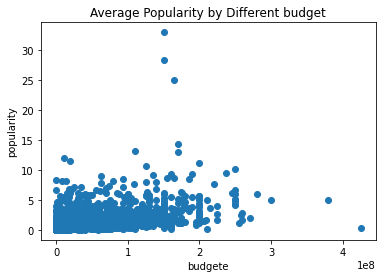

In [ ]:
# plot the relation between budget and popularity 
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budgete',fontsize=10)
plt.ylabel('popularity',fontsize=10)

**Analysation:** What length will receive the heighest of popularity?

In [ ]:
# here I will create 3 groups with query().  <60 min: short   , 60 min <=  <= - 120 min: medium ,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))

In [ ]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

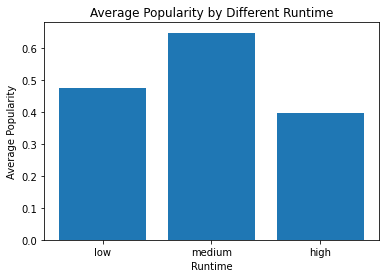

In [ ]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

**Analysation:**Here above bar chart is hard to tell the best length of runtime.Scatter plot may be a better choice.

Text(0, 0.5, 'popularity')

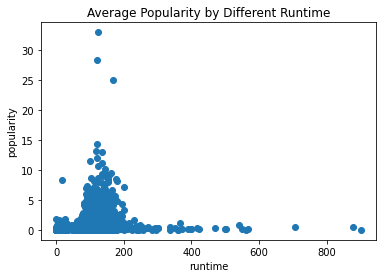

In [ ]:
# plot the relation between runtime and popularity 
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)

**Analysation:**Combine two plots above, we can not simply say, the longer runtime, the more popular movies are.If the movies are within 200 mins,it will be more popular.Once the movie run over 200 mins,it's hard for them to gain high popularity.